In [1]:
import pandas as pd
from ast import literal_eval
import re

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
exp = ['experimental - field /fieldstudy',
 'experimental - laboratory']
modelling = ['modelling','data analysis / statistical analysis / econometrics','Life Cycle Assessments']
qualit = ['review','systematic reviews','survey','qualitative research']
unknown = ['Unknown Method']

col_exp = ['#a6bddb','#1c9099'] # green-blue
col_model = ['#fdbe85','#fd8d3c','#d94701'] # oranges
col_qual = ['#feebe2','#fbb4b9','#f768a1','#ae017e'] # pinks
col_unk = ['#cccccc']

col_meths = col_exp + col_model + col_qual + col_unk
meth_goodOrder = exp + modelling + qualit + unknown

mc = {}
for idx, m in enumerate(meth_goodOrder):
    mc[m] = col_meths[idx]

In [3]:
context_all = ['earth system',
 'equity & ethics',
 'policy/government',
 'public perception',
 'socio-economic pathways',
 'technology']
context_cols = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
context_cols.reverse()
cc = {}
for idx, c in enumerate(context_all):
    cc[c] = context_cols[idx]

In [4]:
meth_dict = {
 'data analysis / statistical analysis / econometrics' : 'Data Analysis / Statistical Analysis / Econometrics',
 'experimental - field /fieldstudy': 'Experimental - Field Study',
 'experimental - laboratory': 'Experimental - Laboratory',
 'modelling': 'Modelling',
 'qualitative research': 'Qualitative Research',
 'review': 'Review',
 'survey': 'Survey',
 'systematic reviews': 'Systematic Review',
 'Unknown Method': 'Unknown Method',
 'Life Cycle Assessments': 'Life Cycle Assessment'
    
}
context_dict = {
 'earth system': 'Earth System',
 'equity & ethics':'Equity & Ethics',
 'policy/government': 'Policy / Government',
 'public perception': 'Public Perception',
 'socio-economic pathways': 'Socio-Economic Pathways',
 'technology': 'Technology'
}

cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','grey',]
all_fields = [
 '1 NATURAL SCIENCES',
 '2 ENGINEERING AND TECHNOLOGY',
 '3 MEDICAL AND HEALTH SCIENCES',
 '4 AGRICULTURAL SCIENCES',
 '5 SOCIAL SCIENCES',
 '6 HUMANITIES',
 'no research field']
fc = {}
for idx, f in enumerate(all_fields):
    fc[f] = cols[idx]


In [5]:
df = pd.read_csv('../data/beccs_in_pub_from_run_2023-06-18.csv')
meths = pd.read_csv('../data/2023-06-18_meth_predicted_unbalanced_hyperparamTuning.csv', 
                    converters={'all_pred_meth': literal_eval})
context = pd.read_csv('../data/2023-06-18_context_predicted_unbalanced_hyperparamTuning.csv'
                      , converters={'all_pred_context': literal_eval})
field_df = pd.read_csv('../data/2023-06-20_research_field.csv')
field_df.loc[pd.isna(field_df['OECD_research_field']), 'OECD_research_field'] = 'no research field'


In [6]:
meths_ex = df.merge(meths[['id','all_pred_meth']], on='id', how='left')
meths_ex = meths_ex.explode('all_pred_meth')
meths_ex = meths_ex.loc[meths_ex['all_pred_meth']!='statistical analysis / econometrics']

context_ex = df.merge(context[['id','all_pred_context']], on='id', how='left')
context_ex = context_ex.explode('all_pred_context')


meths_ex_size = meths_ex.groupby('all_pred_meth',as_index=False).size()
meths_ex_size['col'] = meths_ex_size['all_pred_meth'].replace(mc)
context_ex_size = context_ex.groupby('all_pred_context',as_index=False).size()
context_ex_size['col'] = context_ex_size['all_pred_context'].replace(cc)

field_daccs = df.merge(field_df[['id', 'OECD_research_field']], on='id', how='left')
field_size = field_daccs.groupby('OECD_research_field',as_index=False).size()
field_woNoResearch_size = field_daccs.loc[field_daccs.OECD_research_field!='no research field'
                                      ].groupby('OECD_research_field',as_index=False).size()
field_size['col'] = field_size['OECD_research_field'].replace(fc)
field_woNoResearch_size['col'] = field_woNoResearch_size['OECD_research_field'].replace(fc)


In [7]:
all_fields = sorted(field_df['OECD_research_field'].unique())
field_labs = {}
for field in all_fields[:-1]:
    field_str = field.split(re.findall('[0-9] ',field)[0])[-1].lower()
    field_str = field_str.title().replace('And', 'and')
    field_labs[field] = field_str    
field_labs[all_fields[-1]] = 'No Research Field'

In [17]:
print(meth_goodOrder)
meths_ex_size['size']

['experimental - field /fieldstudy', 'experimental - laboratory', 'modelling', 'data analysis / statistical analysis / econometrics', 'Life Cycle Assessments', 'review', 'systematic reviews', 'survey', 'qualitative research', 'Unknown Method']


0     98
1     58
2    193
3     17
4    321
5    675
6     57
7    430
8     18
9      8
Name: size, dtype: int64

In [14]:
print(all_fields[:-1])
field_woNoResearch_size['size']

['1 NATURAL SCIENCES', '2 ENGINEERING AND TECHNOLOGY', '3 MEDICAL AND HEALTH SCIENCES', '4 AGRICULTURAL SCIENCES', '5 SOCIAL SCIENCES', '6 HUMANITIES']


0    372
1    659
2     96
3     98
4      2
Name: size, dtype: int64

In [16]:
print(context_all)
context_ex_size['size']

['earth system', 'equity & ethics', 'policy/government', 'public perception', 'socio-economic pathways', 'technology']


0      55
1       8
2     126
3      39
4     577
5    1023
Name: size, dtype: int64

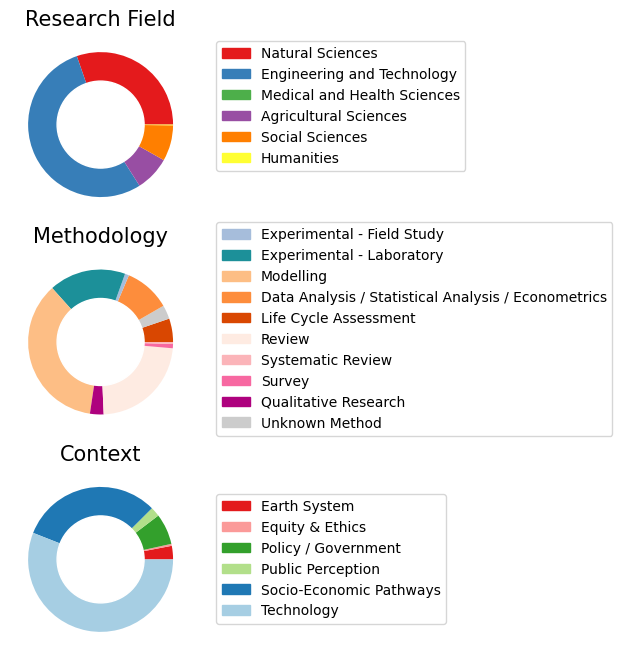

In [43]:
fig, ax = plt.subplots(3,1, figsize=(6,8))

##### methodologies

ax[0].pie(field_woNoResearch_size['size'], colors=field_woNoResearch_size['col'])
my_circle = plt.Circle( (0,0), 0.6, color='white')
ax[0].add_artist(my_circle)

legend_labels = []
for f in all_fields[:-1]:
    legend_labels.append(mpatches.Patch(color=fc[f], label=field_labs[f]))
ax[0].legend(handles=legend_labels, bbox_to_anchor=(1.1, 1))
ax[0].set_title('Research Field',fontsize=15)

##### methodologies
ax[1].pie(meths_ex_size['size'], colors=meths_ex_size['col'])
my_circle = plt.Circle( (0,0), 0.6, color='white')
ax[1].add_artist(my_circle)


legend_labels = []
for m in meth_goodOrder:
    legend_labels.append(mpatches.Patch(color=mc[m], label=meth_dict[m]))
ax[1].legend(handles=legend_labels, bbox_to_anchor=(1.1, 1.2))
ax[1].set_title('Methodology',fontsize=15)

# context
ax[2].pie(context_ex_size['size'], colors=context_ex_size['col'])
my_circle = plt.Circle( (0,0), 0.6, color='white')
ax[2].add_artist(my_circle)

legend_labels = []
for c in context_all:
    legend_labels.append(mpatches.Patch(color=cc[c], label=context_dict[c]))
ax[2].legend(handles=legend_labels, bbox_to_anchor=(1.1, 0.9))
ax[2].set_title('Context',fontsize=15)


plt.savefig('../figures/beccs_meths_context_field.png', bbox_inches='tight', facecolor='white', edgecolor='green')
